In [73]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras import layers
from mlxtend.plotting import plot_decision_regions

## 1. The XOR data


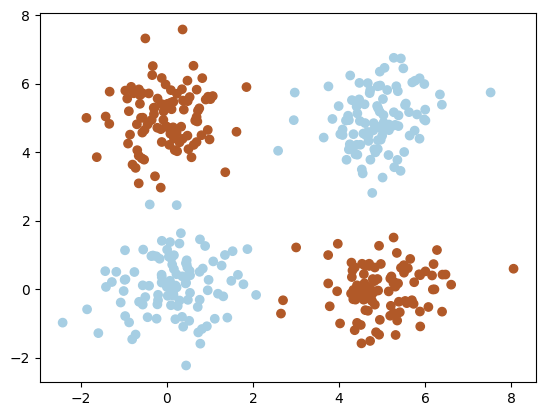

In [74]:
# We create four blobs with different centers to create the original data
centers = ([0, 0], [0, 5], [5, 0], [5, 5])
X, y = datasets.make_blobs(n_samples=400, centers = centers, cluster_std=0.8)
# Reduce the classes to two classe simulating the XOR problem 
y[y == 3] = 0
y[y == 2] = 1
# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

## 2. Create Neural Network fit for XOR problem

In [75]:
xor_classifier = tf.keras.Sequential([
    layers.Input(shape=(2, ), name="input"),
    layers.Dense(units=2, activation='relu', name='hidden'), #try tanh, relu,  as well
    layers.Dense(units=1, activation="sigmoid", name="output")
])

In [76]:
xor_classifier.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 2)                 6         
                                                                 
 output (Dense)              (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


## 3. Compiling the model

In [77]:
xor_classifier.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
                                  loss= tf.keras.losses.BinaryCrossentropy(from_logits=False), 
                                  metrics=['accuracy'])

## 4. Training the model

In [81]:
history = xor_classifier.fit(X, y, epochs=1000, verbose=0)

## 5. Evaluate and Plot Decision Boundary

In [82]:
test_results = xor_classifier.evaluate(X, y, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

13/13 [==============================] - 0s 3ms/step - loss: 0.0689 - accuracy: 0.9700
Test results - Loss: 0.06886716187000275 - Accuracy: 97.00000286102295%


9600/9600 [==============================] - 19s 2ms/step


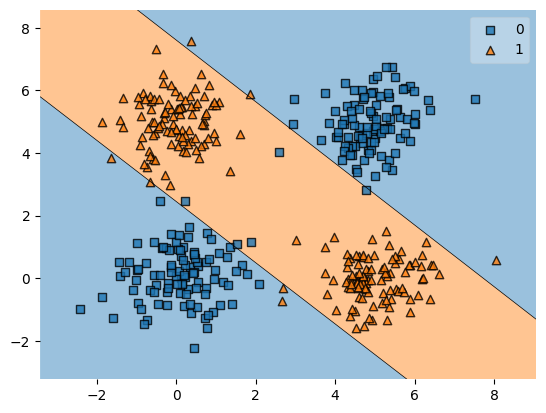

In [83]:
plot_decision_regions(X, y, clf=xor_classifier)
plt.show()